In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_path = "/Users/dharamvir/Documents/algo/projects/keep_babies_safe/training_data"
data_dir = pathlib.Path(dataset_path)

In [3]:
image_count = len(list(data_dir.glob("*/*.jpg")))
print(image_count)

1437


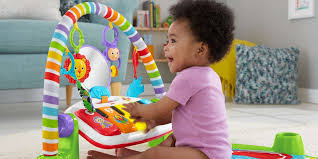

In [5]:
toy1 = "/Users/dharamvir/Documents/algo/projects/keep_babies_safe/training_data/toys/baby toy5.jpg"
PIL.Image.open(str(toy1))

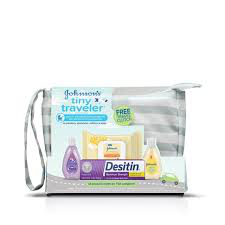

In [6]:
product1 = "/Users/dharamvir/Documents/algo/projects/keep_babies_safe/training_data/products/baby product174.jpg"
PIL.Image.open(product1)

In [8]:
batch_size = 32
img_height = 100
img_width = 100

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=60616,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 1437 files belonging to 2 classes.
Using 1294 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=60616,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 1437 files belonging to 2 classes.
Using 143 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['products', 'toys']


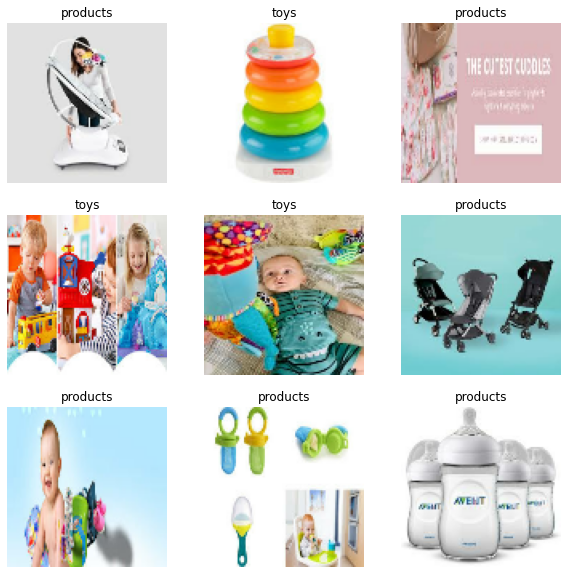

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 100, 100, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
#creating the model
num_classes = 2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
41/41 [==============================] - 4s 94ms/step - loss: 0.7687 - accuracy: 0.5611 - val_loss: 0.6817 - val_accuracy: 0.5664
Epoch 2/10
41/41 [==============================] - 3s 85ms/step - loss: 0.5995 - accuracy: 0.6971 - val_loss: 0.5558 - val_accuracy: 0.7622
Epoch 3/10
41/41 [==============================] - 4s 86ms/step - loss: 0.5490 - accuracy: 0.7411 - val_loss: 0.5227 - val_accuracy: 0.7902
Epoch 4/10
41/41 [==============================] - 4s 88ms/step - loss: 0.5030 - accuracy: 0.7728 - val_loss: 0.5299 - val_accuracy: 0.7552
Epoch 5/10
41/41 [==============================] - 4s 101ms/step - loss: 0.4731 - accuracy: 0.7805 - val_loss: 0.5530 - val_accuracy: 0.6993
Epoch 6/10
41/41 [==============================] - 5s 124ms/step - loss: 0.4544 - accuracy: 0.7975 - val_loss: 0.4973 - val_accuracy: 0.7692
Epoch 7/10
41/41 [==============================] - 4s 105ms/step - loss: 0.3915 - accuracy: 0.8300 - val_loss: 0.5045 - val_accuracy: 0.7692
Epoch 8/10

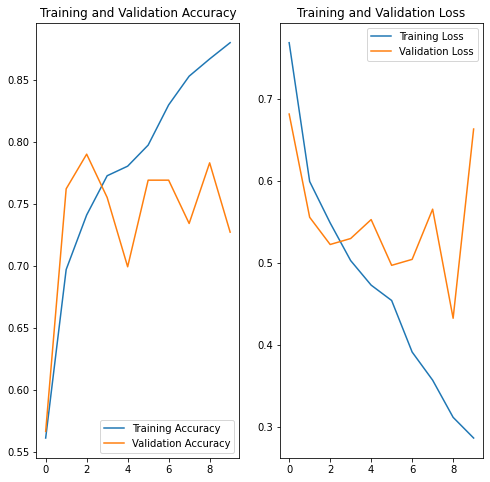

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [22]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 100, 100, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)       

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
41/41 [==============================] - 5s 112ms/step - loss: 0.6994 - accuracy: 0.5711 - val_loss: 0.5951 - val_accuracy: 0.7133
Epoch 2/15
41/41 [==============================] - 5s 114ms/step - loss: 0.5938 - accuracy: 0.7125 - val_loss: 0.5271 - val_accuracy: 0.7483
Epoch 3/15
41/41 [==============================] - 4s 106ms/step - loss: 0.5531 - accuracy: 0.7396 - val_loss: 0.5009 - val_accuracy: 0.7972
Epoch 4/15
41/41 [==============================] - 5s 129ms/step - loss: 0.5389 - accuracy: 0.7512 - val_loss: 0.4824 - val_accuracy: 0.8182
Epoch 5/15
41/41 [==============================] - 5s 128ms/step - loss: 0.5394 - accuracy: 0.7496 - val_loss: 0.4647 - val_accuracy: 0.8252
Epoch 6/15
41/41 [==============================] - 5s 121ms/step - loss: 0.5183 - accuracy: 0.7651 - val_loss: 0.4604 - val_accuracy: 0.8182
Epoch 7/15
41/41 [==============================] - 5s 114ms/step - loss: 0.5127 - accuracy: 0.7689 - val_loss: 0.4916 - val_accuracy: 0.7902
Epoch 

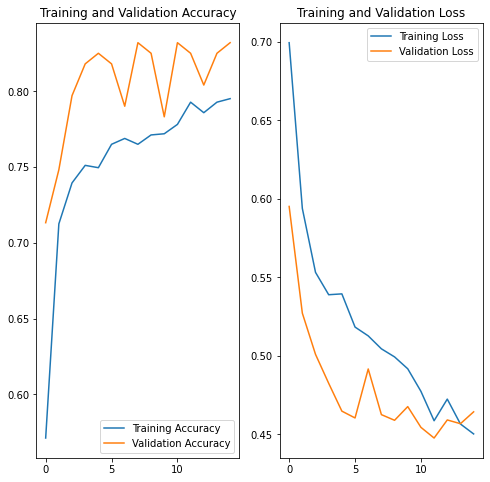

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:

# image_url = "/Users/dharamvir/Downloads/dataset/images/e6c9e94948.jpg"
# img = keras.preprocessing.image.load_img(
#     image_url, target_size=(img_height, img_width)
# )
# print(img)
# img_array = keras.preprocessing.image.img_to_array(img)
# print(img_array)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
# print(img_array)

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

images = []
folder_path = "/Users/dharamvir/Downloads/dataset/images/"
for img in os.listdir(folder_path):
    full_img = os.path.join(folder_path, img)
    full_img = keras.preprocessing.image.load_img(full_img, target_size=(img_width, img_height))
    full_img = keras.preprocessing.image.img_to_array(full_img)
    full_img = tf.expand_dims(full_img, axis=0)
    predict = model.predict(full_img)
    score = tf.nn.softmax(predict[0])
    images.append([img,class_names[np.argmax(score)]])
    
print(images)

# stack up images list to pass for prediction
# images = np.vstack(images)
# predictions = model.predict_classes(images, batch_size=10)


# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

[['b3f9ff1d8b.jpg', 'toys'], ['923f340d2d.jpg', 'products'], ['e9c637e725.jpg', 'toys'], ['bce7d33cd9.jpg', 'products'], ['ffbf5217ec.jpg', 'toys'], ['a20b96afc7.jpg', 'toys'], ['cacc609f3e.jpg', 'products'], ['d209e71570.jpg', 'toys'], ['c9afc8aa61.jpg', 'toys'], ['b156744011.jpg', 'toys'], ['ff11b2859a.jpg', 'toys'], ['75fa04349a.jpg', 'products'], ['533c786e32.jpg', 'toys'], ['0a284c5f95.jpg', 'products'], ['1b69ca8da2.jpg', 'toys'], ['28f34c848b.jpg', 'toys'], ['8f1deb0644.jpg', 'toys'], ['1962fd111a.jpg', 'products'], ['624a1bd5f9.jpg', 'products'], ['8624657723.jpg', 'toys'], ['c60d4236d3.jpg', 'products'], ['66fdb64235.jpg', 'toys'], ['4d0ea7c9d6.jpg', 'toys'], ['470a95dae8.jpg', 'toys'], ['54981e06f7.jpg', 'toys'], ['e05d683e4c.jpg', 'toys'], ['48c8d6efbe.jpg', 'toys'], ['ca00f65c7e.jpg', 'products'], ['b4796b0200.jpg', 'toys'], ['787e1a1ad0.jpg', 'toys'], ['de52185320.jpg', 'products'], ['149569c3c4.jpg', 'products'], ['f64d8212e7.jpg', 'products'], ['120951f217.jpg', 'product

In [40]:
images = sorted(images,key=lambda x: x[0])

In [41]:
import pandas as pd
df = pd.DataFrame(data=images,  columns=["Image", "Class_of_image"])

In [43]:
df.loc[(df.Class_of_image == 'products'),'Class_of_image']='consumer_products'

In [44]:
df

,Image,Class_of_image
0,006a22fa50.jpg,toys
1,01484e7348.jpg,consumer_products
2,015d91ab7b.jpg,toys
3,01f8ce31f6.jpg,toys
4,020e280221.jpg,consumer_products
...,...,...
1126,fe97c8f4b2.jpg,consumer_products
1127,fea831ee5f.jpg,toys
1128,fef359ca4f.jpg,toys
1129,ff11b2859a.jpg,toys


In [45]:
df.to_csv (r'/Users/dharamvir/Documents/algo/projects/keep_babies_safe/test.csv', index = False, header=False)